# import libs


In [39]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # This will prevent the memory leak warning

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA





# load DF from sklearn

In [40]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# k-Means  clusterization

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop('species', axis=1))

C:\Users\tsvet\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(['species', 'cluster'], axis=1))

Text(0, 0.5, 'PCA компонент 2')

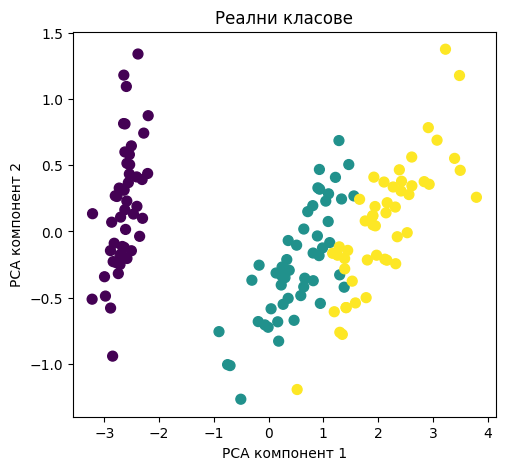

In [43]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['species'], cmap='viridis', s=50)
plt.title('Реални класове')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')

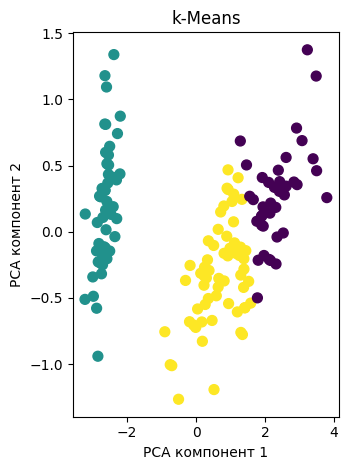

In [44]:

plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('k-Means')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')

plt.tight_layout()
plt.show()

In [45]:
df['cluster_corrected'] = df['cluster'].replace({0: 2, 1: 0, 2: 1})

accuracy = sum(df['species'] == df['cluster_corrected']) / len(df)
print(f"Точност на k-Means: {accuracy * 100:.2f}%")

Точност на k-Means: 88.67%
